In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import tree

In [3]:
df=pd.read_csv('D:\Machine_Learning\Machine_Learning\Decision_tree\\titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data=df.copy()

In [7]:
data.shape

(891, 12)

In [8]:
df.shape

(891, 12)

In [9]:
df=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis=1)
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [11]:
import math
age_mean=df['Age'].mean()
age_mean=math.floor(age_mean)
print(age_mean)

29


In [12]:
df['Age']=df['Age'].fillna(age_mean)
df.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,29.0,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708


In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
df['Sex_e']=le_sex.fit_transform(df.Sex)

In [15]:
df=df.drop('Sex', axis=1)
df

,Survived,Pclass,Age,Fare,Sex_e
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
888,0,3,29.0,23.4500,0
889,1,1,26.0,30.0000,1


In [16]:
target=df.Survived
attributs=df.drop('Survived', axis=1)

In [17]:
model=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test =train_test_split(attributs, target, test_size=0.2)

In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
X_test.head(20)

,Pclass,Age,Fare,Sex_e
221,2,27.0,13.0000,1
774,2,54.0,23.0000,0
528,3,39.0,7.9250,1
498,1,25.0,151.5500,0
512,1,36.0,26.2875,1
690,1,31.0,57.0000,1
847,3,35.0,7.8958,1
180,3,29.0,69.5500,0
13,3,39.0,31.2750,1
438,1,64.0,263.0000,1


In [22]:
model.predict(X_test)

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [23]:
model.score(X_test,y_test)

0.8156424581005587

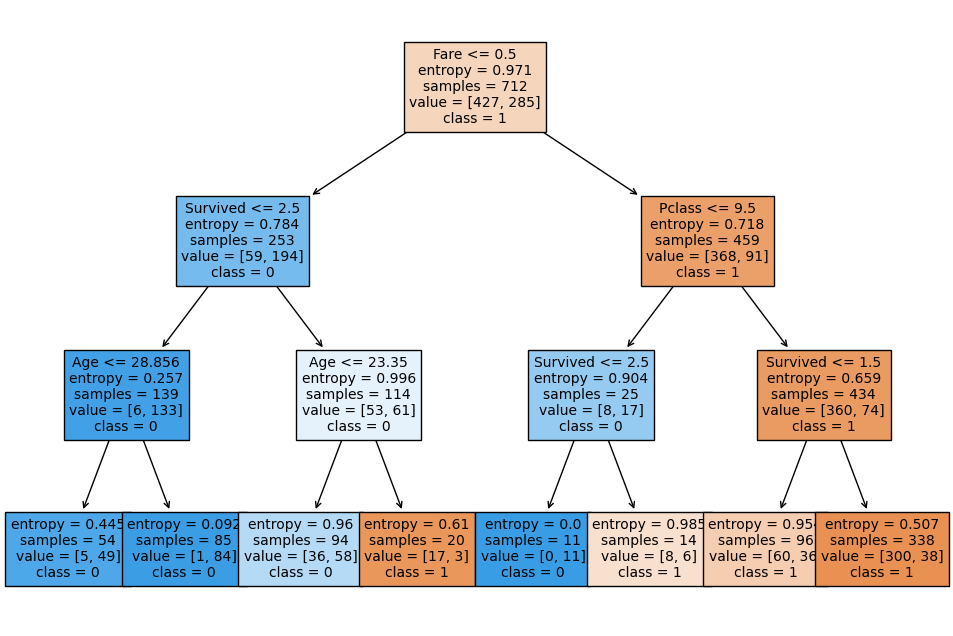

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
ax=plot_tree(model, feature_names=df.columns.tolist(), fontsize=10, filled=True, class_names=['1','0'])

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)

In [26]:
print('Accuracy: ', accuracy)

Accuracy:  0.8156424581005587


In [27]:
cm

array([[107,  15],
       [ 18,  39]], dtype=int64)

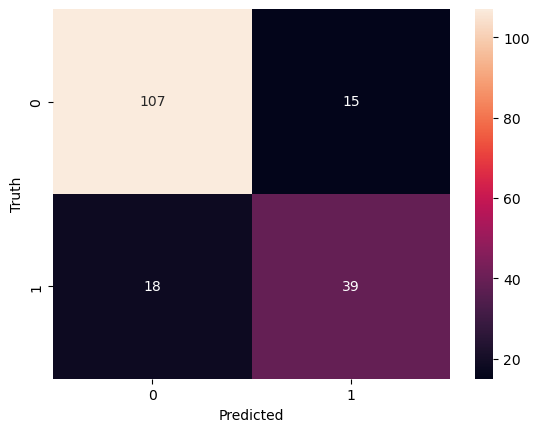

In [30]:
sns.heatmap(cm,annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [31]:
model.predict([[1,28,8.0500,1]])

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)